In [11]:
%matplotlib inline
import numpy as np
import pdb
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import copy
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import preprocessing
from sklearn.decomposition import PCA
import re
np.random.seed(0)

In [15]:
with open('docword.nips.txt') as f:
    lines = f.readlines()
num_n = int(lines[0])
num_d = int(lines[1])
X = np.zeros((num_n, num_d))
lines = lines[3:]
for line in lines:
    split = re.findall(r'\d+', line)
    row = int(split[0]) - 1
    col = int(split[1]) - 1
    val = int(split[2])
    X[row,col] = val

In [18]:
###### handwritten digits dataset ######
X_scale = preprocessing.scale(X, with_mean=True, with_std=False)
X.shape, X_scale.shape

((1500, 12419), (1500, 12419))

In [19]:
pca = PCA(n_components=2)
X1 = copy.deepcopy(X_scale)
X1 = pca.fit_transform(X1)

X1.shape

(1500, 2)

In [20]:
X1[:10,:].shape

(10, 2)

In [21]:
# X2 = copy.deepcopy(X) # non-zero mean sparse matrix
num_n, num_d = X.shape
X_bar = np.zeros((1,num_d))
for row in X:
    X_bar += row
X_bar = X_bar / num_n
one = np.ones((num_n,1))
# pdb.set_trace()
XT = np.transpose(X)
X_barT = np.transpose(X_bar)
oneT = np.transpose(one)
cov = np.matmul(XT,X) - np.matmul(np.matmul(XT,one),X_bar) - \
        np.matmul(X_barT,np.matmul(oneT,X)) + num_n * np.matmul(X_barT,X_bar)
cov = cov / num_n
# now do eigenvalue decomp
value, vector = np.linalg.eig(cov)
# X2[:10,:].shape

In [22]:
index = value.argsort()[::-1][:2]
principle = vector[:,index]
principle.shape, vector.shape

((12419, 2), (12419, 12419))

In [23]:
left = X1[:10,:]
right = np.matmul(X[:10,:], principle)
# right = right*[-1,1] # go reverse direction

/home/baolin/anaconda3/envs/sevir/lib/python3.7/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


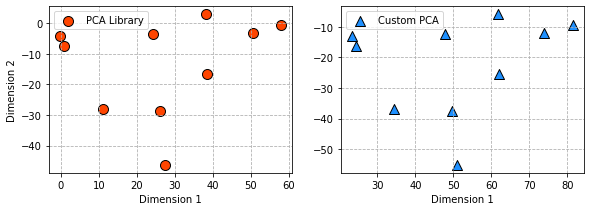

In [24]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.1, 'wspace': 0.2, 'bottom': 0.13, 
                                    'top': 0.9, 'right':0.995, 'left':0.17}, figsize=(9,3))

axs[0].scatter(left[:, 0], left[:, 1], label='PCA Library', marker='o', 
               s=100, edgecolor='black', color='orangered')
axs[1].scatter(right[:, 0], right[:, 1], label='Custom PCA', marker='^', 
               s=100, edgecolor='black', color='dodgerblue')

for ax in axs:
    ax.grid(which='major', axis='both', ls='dashed', zorder=0)
    ax.set_xlabel('Dimension 1')
    ax.legend()
# axs[0].set_title('Training Acc.')
# axs[1].set_title('Testing Acc.')
axs[0].set_ylabel('Dimension 2')
fig.savefig(f'plots/p2_b_nips.png', bbox_inches='tight')